# Pymaceuticals Inc.
---

### Observation and analysis

In this study, 249 animals diagnosed with squamous cell carcinoma (SCC) tumors were treated with various drug regimens. The researchers aimed to compare the performance of Pymaceuticals' drug of interest, Capomulin, against other treatments. Tumor development was observed and measured over a 45-day period.
The analysis revealed a balanced ratio of male and female mice, indicating no gender bias in the study. The following conclusions were drawn from the analysis:

1) Capomulin and Ramicane treatments exhibited greater effectiveness compared to the other drugs, as evidenced by the boxplot and statistics table. <br></br>


2) The administration of Capomulin to a specific mouse (Mouse ID = "l509") resulted in positive outcomes, with the tumor size decreasing over the duration of study. <br></br>


3) The correlation coefficient of 0.84 between mouse weight and average tumor volume suggests a strong tendency for the average tumor size to increase as the weight of the mouse increases. <br></br>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the metadata table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Display the info from the data table
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [3]:
# Display the study results data table for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the merged data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Display the merged data table for information
combined_mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].value_counts())

249

In [7]:
# Checking the number of mice (another way)
len(mouse_metadata["Mouse ID"].unique())

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = pd.DataFrame(combined_mouse_df.loc[combined_mouse_df.duplicated(['Mouse ID','Timepoint'])])
mouse_id["Mouse ID"].unique()
mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Find the unique mouse id -  another method
combined_mouse_df.loc[combined_mouse_df.duplicated(subset = ['Mouse ID','Timepoint']), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [10]:
combined_mouse_df.groupby(["Mouse ID"]).mean(numeric_only = True)["Tumor Volume (mm3)"]

Mouse ID
a203    56.312708
a251    55.237095
a262    58.611631
a275    52.770965
a366    54.639906
          ...    
z435    46.942214
z578    38.411510
z581    53.979584
z795    54.880317
z969    60.194652
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [11]:
combined_mouse_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989"] 
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Find the indexes of duplicate mouse id and drop the rows
duplicate_mouse_data = combined_mouse_df[combined_mouse_df["Mouse ID"] == "g989"].index
duplicate_mouse_data

Int64Index([107, 137, 329, 360, 620, 681, 815, 869, 950, 1111, 1195, 1380,
            1592],
           dtype='int64')

In [14]:
# Drop the rows
combined_mouse_df.drop(duplicate_mouse_data, inplace = True)
combined_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the clean DataFrame.
len(combined_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_gb = combined_mouse_df.groupby("Drug Regimen")

# summary_df.head(5)

tumor_mean = drug_gb["Tumor Volume (mm3)"].mean() 
tumor_median = drug_gb["Tumor Volume (mm3)"].median() 
tumor_std = drug_gb["Tumor Volume (mm3)"].std() 
tumor_sem = drug_gb["Tumor Volume (mm3)"].sem() 

summary_df = pd.DataFrame(
    {
    "Mean" : tumor_mean, 
    "Median" : tumor_median, 
    "Standard Deviation" : tumor_std, 
    "SEM" : tumor_sem
    }
)

summary_df


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# use drop function to drop the columns to resolve the error.
# summary_stat = combined_mouse_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stat = combined_mouse_df.drop(["Mouse ID", "Sex"], axis=1).groupby("Drug Regimen").\
                agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

summary_stat = summary_stat.rename(columns = 
                                   {
                                       "mean" : "Mean",
                                       "median" : "Median",
                                       "var" : "Variance",
                                       "std" : "Standard Deviation",
                                       "sem" : "SEM"
                                   })
summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

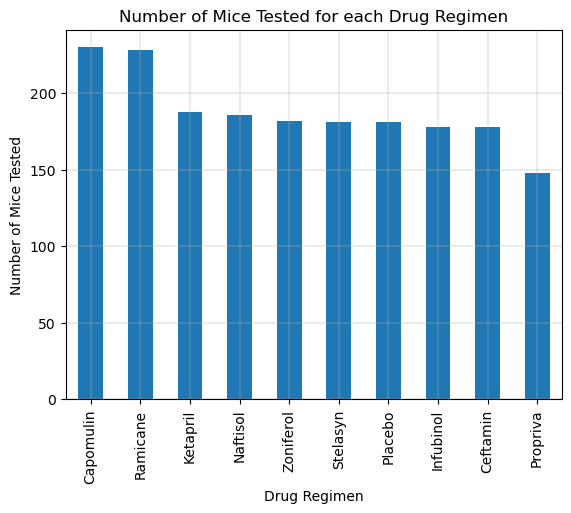

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_per_drug = combined_mouse_df["Drug Regimen"].value_counts()
plot_pandas = mouse_per_drug.plot.bar(color='tab:blue')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested for each Drug Regimen")
plt.grid(linewidth = 1.5, alpha = 0.25)
plt.savefig("images/bar_plot_drug_vs_number_of_mice.png", bbox_inches = "tight")
plt.show()

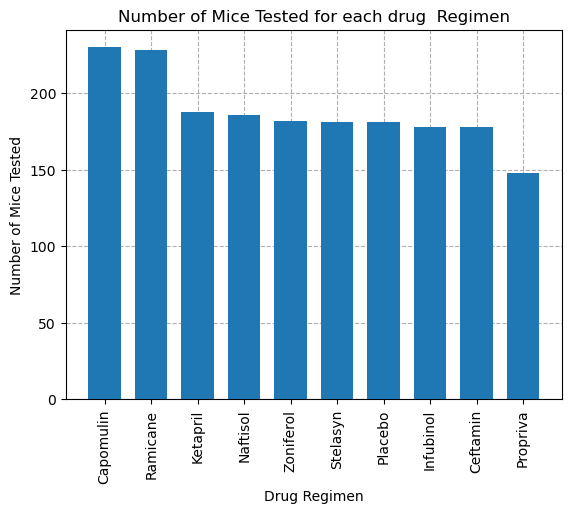

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_per_drug = combined_mouse_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(mouse_per_drug))
plt.bar(x_axis, mouse_per_drug, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_per_drug.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title('Number of Mice Tested for each drug  Regimen')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(linestyle = "dashed")
plt.savefig("images/pyplot_bar_drug_vs_number_of_mice.png", bbox_inches = "tight")

# Display resulting plot
plt.show()


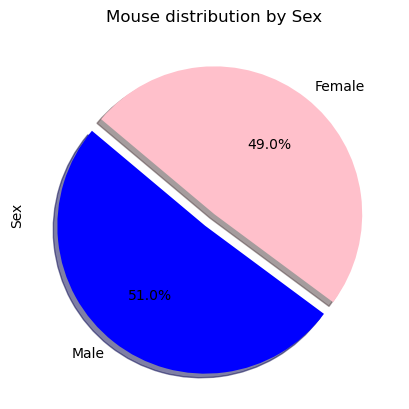

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = combined_mouse_df["Sex"].value_counts()
labels = ["Male", "Female"]
explode = [0.1, 0]
colors = ["blue", "pink"]
data.plot(kind="pie", explode=explode, labels=data.index.values, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140, title="Mouse distribution by Sex")
plt.savefig("images/pandas_pie_male_vs_female.png", bbox_inches = "tight")
plt.show()

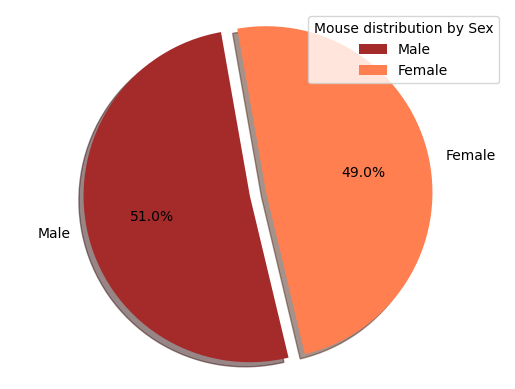

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tried a new look to visualize
colors = ["brown", "coral"]
plt.pie(data, labels=data.index.values, colors=colors, startangle=100, explode=explode, shadow=True, autopct="%1.1f%%")
plt.legend(title="Mouse distribution by Sex", loc ="upper right")

# Set equal axis
plt.axis("equal") 
plt.savefig("images/pyplot_pie_male_vs_female.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = last_timepoint.merge(combined_mouse_df, on=["Mouse ID", "Timepoint"], how="left")
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_volume.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


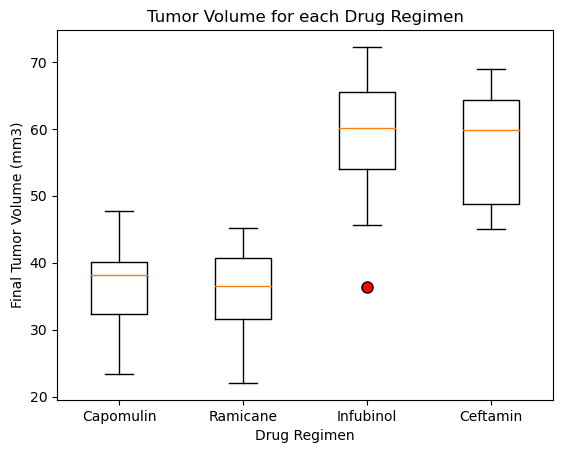

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(total_tumor_volume, labels=drug_list, flierprops=flierprops)
plt.title('Tumor Volume for each Drug Regimen',fontsize =12)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 10)
plt.xlabel('Drug Regimen', fontsize = 10)
plt.savefig("images/boxplot_final_tumor_volume.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select the dataframe with Capomulin
Capomulin_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin",:]
single_mouse_data = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
single_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


In [26]:
# specify the x and y axis data
x_axis = single_mouse_data["Timepoint"]
y_axis = single_mouse_data["Tumor Volume (mm3)"]
y_axis

231     45.000000
253     45.851193
539     46.759074
881     47.488599
982     48.070452
1146    44.006257
1414    44.708055
1499    40.207288
1723    40.770813
1771    41.483008
Name: Tumor Volume (mm3), dtype: float64

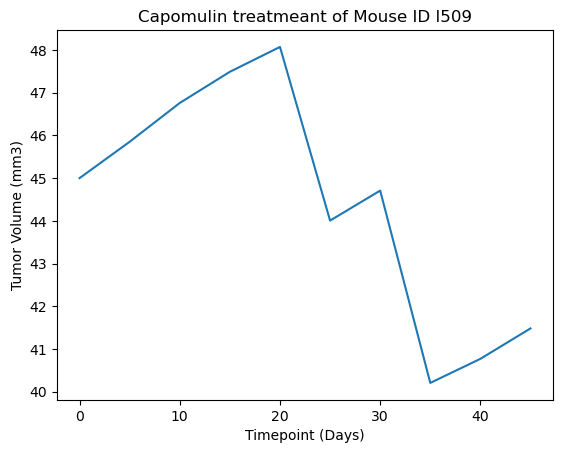

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
fig1, ax1 = plt.subplots()
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatmeant of Mouse ID l509",fontsize =12)
plt.xlabel("Timepoint (Days)",fontsize =10)
plt.ylabel("Tumor Volume (mm3)",fontsize =10)
plt.savefig("images/line_plot_tumor_volume_vs_time_point.png", bbox_inches = "tight")
plt.show()

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df_mean = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)
Capomulin_df_mean

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [29]:
# specify the x and y axis data
x_axis = Capomulin_df_mean["Weight (g)"]
y_axis = Capomulin_df_mean["Tumor Volume (mm3)"]
x_axis

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

## Correlation and Regression

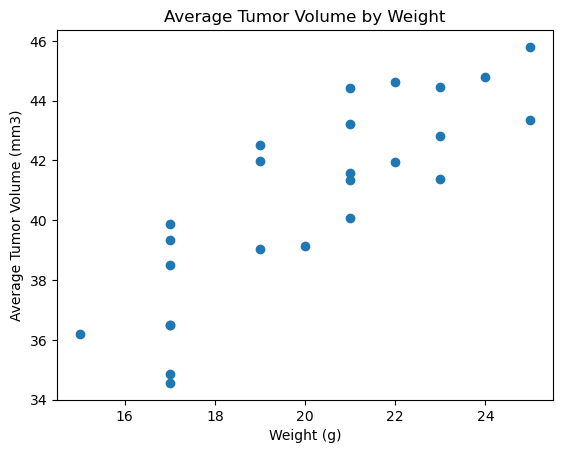

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(x=x_axis, y=y_axis)
plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


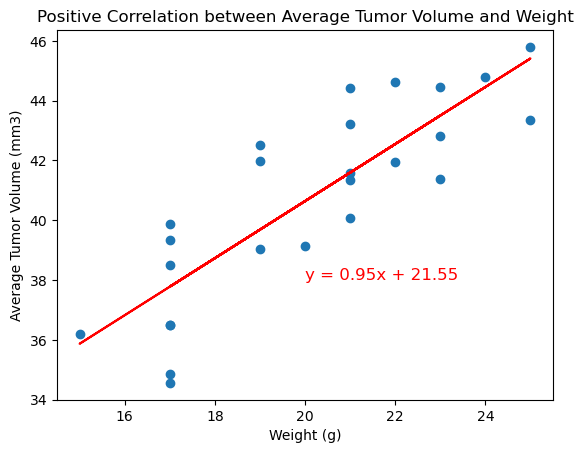

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x = x_axis, y = y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.title("Positive Correlation between Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy = (20,38), fontsize = 12, color = "red")
plt.savefig("images/scatter_plot_weight_vs_avg_tumor_volume.png", bbox_inches = "tight")
plt.show()